In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import wbdata
import matplotlib.pyplot as plt
import scipy.stats as st
from sympy import *
import time as dt
from sklearn.linear_model import LinearRegression
import warnings
from IPython.display import Math,Latex
from pandas.errors import SettingWithCopyWarning
from statsmodels.api import *
from statsmodels.stats.diagnostic import het_goldfeldquandt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

def shapiro_wilk(df):
    # Apply Shapiro-Wilk test to each column
    for column in df.columns:
        stat, p_value = st.shapiro(df[column])
        print(f"Column: {column}")
        print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")
        if p_value > 0.05:
            print("Data is likely normally distributed.")
        else:
            print("Data is likely not normally distributed.")
        print("\n")

def spearman(df,x,y):
    """_summary_

    Args:
        df (pd.Dataframe): data
        x (str): name of X column
        y (str): name of Y column

    Returns:
        pd.Dataframe: spearman matrix
    """
    return df[[x,y]].corr(method='spearman')

def kendall(df,x,y):
    """_summary_

    Args:
        df (pd.Dataframe): data
        x (str): name of X column
        y (str): name of Y column

    Returns:
        pd.Dataframe: kendall matrix
    """
    return df[[x,y]].corr(method='kendall')

def goldfeldquandt(df,x,y):
    """_summary_

    Args:
        df (pd.Dataframe): data
        x (str): name of X column
        y (str): name of Y column
    """
    gq_test=het_goldfeldquandt(df[[y]],df[[x]])
    print(f"F-statistic: {gq_test[0]}, p-value: {gq_test[1]}")
    
    return (gq_test[0],gq_test[1])

def park(df,x,y):
    X = df[x]
    Y = df[y]
    X = add_constant(X)  # Add constant for intercept
    model = OLS(Y, X).fit()
    
    residuals = model.resid
    residuals_squared = residuals ** 2

    # Step 3: Apply logarithm to the squared residuals
    log_residuals_squared = np.log(residuals_squared)

    # Step 4: Use the logarithm of the predictor variable
    log_X = np.log(df['X'])

    # Step 5: Perform secondary regression (log squared residuals ~ log predictor)
    log_X_with_const = add_constant(log_X)
    park_test_model = OLS(log_residuals_squared, log_X_with_const).fit()

    # Print Park test results
    print(park_test_model.summary())

init_printing(use_unicode=True,use_latex=True)
def sm_model_outputs(model,untrust):
    r2=model.rsquared
    params=model.params
    nobs=model.nobs
    df=model.df_model
    tvalues=model.tvalues
    pvalues=model.pvalues
    f_pvalue=model.f_pvalue
    fvalue=model.fvalue
    untrust=0.05
    t_crit = st.t.ppf(1 - untrust/2, nobs - (df + 1))
    print(f'Коэффициент Детерминаци равен: {str(round(r2*100,3)).replace(".",",")}% .')
    print(f'Коэфициенты b при каждом члене равны соответственно: {("; ".join(list((params).transform(str)))).replace(".",",")} .')
    for i in range(len(params)):
        if pvalues.iloc[i]<untrust:
            print(f'Коэффициент {str(params.iloc[i]).replace(".",",")} стат. значим, т.к. значение t = {str(round(abs(tvalues.iloc[i]),4)).replace(".",",")} больше t_критического = {str(round(t_crit,4)).replace(".",",")} <=> pvalue={str(pvalues.iloc[i]).replace(".",",")} < {str(untrust).replace(".",",")}')
        else:
            print(f'Коэффициент {str(params.iloc[i]).replace(".",",")} стат. незначим, т.к. значение t = {str(round(abs(tvalues.iloc[i]),4)).replace(".",",")} меньше t_критического = {str(round(t_crit,4)).replace(".",",")} <=> pvalue={str(pvalues.iloc[i]).replace(".",",")} > {str(untrust).replace(".",",")}')
    print (f'Регрессия стат. значима, т.к. F-значение критерия фишера = {str(round(fvalue,4)).replace(".",",")} больше F_критического <=> fvalue={str(f_pvalue).replace(".",",")} < {str(untrust).replace(".",",")}')
 
df=pd.read_excel('Книга1 (3).xlsx',usecols=[9,10])
df
X=df[['X']]
y=df[['Y']]
df[['1']]=[1]*X.shape[1]
df

,X,Y,1
0,26.2,10.0,1
1,33.1,11.2,1
2,42.5,15.0,1
3,47.0,20.5,1
4,48.5,21.2,1
5,49.0,19.5,1
6,49.1,23.0,1
7,50.9,19.0,1
8,52.4,19.5,1
9,53.2,18.0,1


In [89]:
model=LinearRegression()
model.fit(X,y)

display(Math('y = '+ f'{model.intercept_[0]}+'+'+'.join([str(model.coef_[0,i])+f'x_{i+1}' for i in range(len(model.coef_[0]))])))

<IPython.core.display.Math object>

In [90]:
m1 = OLS(df[['Y']],df[['1','X']]).fit()
display(m1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     14.01
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           0.000832
Time:                        15:25:34   Log-Likelihood:                -102.20
No. Observations:                  30   AIC:                             208.4
Df Residuals:                      28   BIC:                             211.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
1              6.8701      4.819      1.426      0.165      -3.000      16.741
X              0.2660      0.071      3.743      0.001       0.120       0.412
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   2.412
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.056
Skew:                           0.017   Prob(JB):                        0.972
Kurtosis:                       2.790   Cond. No.                         237.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
sm_model_outputs(m1,0.05)

Коэффициент Детерминаци равен: 33,354% .
Коэфициенты b при каждом члене равны соответственно: 6,870148454474307; 0,2660179294883642 .
Коэффициент 6,870148454474307 стат. незначим, т.к. значение t = 1,4258 меньше t_критического = 2,0484 <=> pvalue=0,1649900206418994 > 0,05
Коэффициент 0,2660179294883642 стат. значим, т.к. значение t = 3,7434 больше t_критического = 2,0484 <=> pvalue=0,0008323503731813874 < 0,05
Регрессия стат. значима, т.к. F-значение критерия фишера = 14,0133 больше F_критического <=> fvalue=0,0008323503731813867 < 0,05


In [92]:
m= OLS(df[['Y']],df[['X']]).fit()
display(m.summary())
sm_model_outputs(m,0.05)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              307.7
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                    5.57e-17
Time:                        15:25:34   Log-Likelihood:                         -103.25
No. Observations:                  30   AIC:                                      208.5
Df Residuals:                      29   BIC:                                      209.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.3631      0.021     17.540      0.000       0.321       0.405
==============================================================================
Omnibus:                        4.375   Durbin-Watson:                   2.283
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                2.820
Skew:                          -0.681   Prob(JB):                        0.244
Kurtosis:                       3.633   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент Детерминаци равен: 91,386% .
Коэфициенты b при каждом члене равны соответственно: 0,3630969007981212 .
Коэффициент 0,3630969007981212 стат. значим, т.к. значение t = 17,5404 больше t_критического = 2,0484 <=> pvalue=5,567220621115813e-17 < 0,05
Регрессия стат. значима, т.к. F-значение критерия фишера = 307,6655 больше F_критического <=> fvalue=5,567220621115846e-17 < 0,05


Провести тесты на гетероскедостичность
графический тест
тест спирмена
тест гольфойда квандера

In [93]:
model=LinearRegression(fit_intercept=False)
model.fit(X,y)

display(Math('y = ' +'+'.join([str(model.coef_[0,i])+f'x_{i+1}' for i in range(len(model.coef_[0]))])))

<IPython.core.display.Math object>

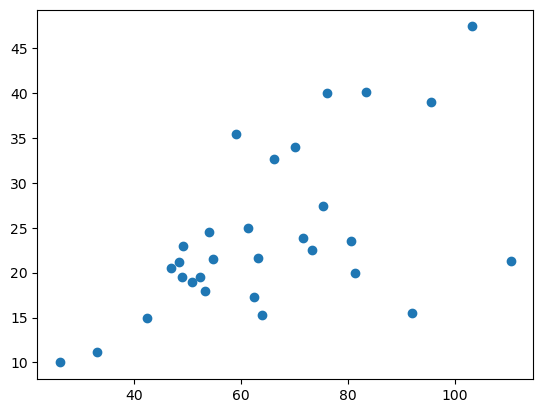

In [94]:
plt.scatter(X,y)

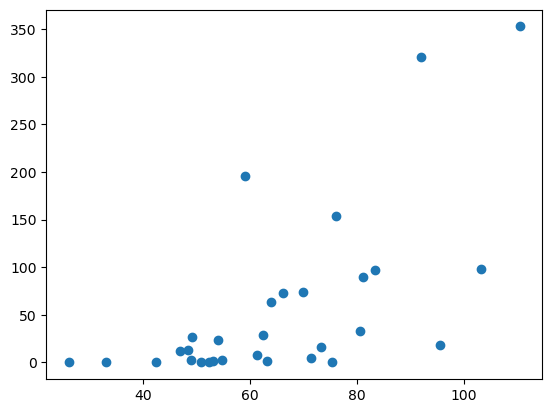

In [95]:
df[['X2']]=df[['X']]*df[['X']]
df[['Y2']]=df[['Y']]*df[['Y']]
df[['Y_']]=pd.DataFrame(m.predict(df[['X']]))
df['e']=(df['Y']-df['Y_'])**2
df[['e']]
plt.scatter(df['X'],df['e'])

In [96]:
df['Rx']=df['X'].rank()
df['Re']=df['e'].rank()
df.sort_values('Re')

,X,Y,1,X2,Y2,Y_,e,Rx,Re
21,75.4,27.4,1,5685.16,750.76,27.377506,0.000506,22.0,1.0
2,42.5,15.0,1,1806.25,225.00,15.431618,0.186294,3.0,2.0
8,52.4,19.5,1,2745.76,380.25,19.026278,0.224413,9.0,3.0
0,26.2,10.0,1,686.44,100.00,9.513139,0.237034,1.0,4.0
7,50.9,19.0,1,2590.81,361.00,18.481632,0.268705,8.0,5.0
1,33.1,11.2,1,1095.61,125.44,12.018507,0.669954,2.0,6.0
15,63.1,21.6,1,3981.61,466.56,22.911414,1.719808,16.0,7.0
9,53.2,18.0,1,2830.24,324.00,19.316755,1.733844,10.0,8.0
11,54.8,21.5,1,3003.04,462.25,19.897710,2.567333,12.0,9.0
5,49.0,19.5,1,2401.00,380.25,17.791748,2.918124,6.0,10.0


In [97]:
df['d']=(df['Rx']-df['Re'])**2
df

,X,Y,1,X2,Y2,Y_,e,Rx,Re,d
0,26.2,10.0,1,686.44,100.00,9.513139,0.237034,1.0,4.0,9.0
1,33.1,11.2,1,1095.61,125.44,12.018507,0.669954,2.0,6.0,16.0
2,42.5,15.0,1,1806.25,225.00,15.431618,0.186294,3.0,2.0,1.0
3,47.0,20.5,1,2209.00,420.25,17.065554,11.795417,4.0,13.0,81.0
4,48.5,21.2,1,2352.25,449.44,17.610200,12.886666,5.0,14.0,81.0
5,49.0,19.5,1,2401.00,380.25,17.791748,2.918124,6.0,10.0,16.0
6,49.1,23.0,1,2410.81,529.00,17.828058,26.748986,7.0,18.0,121.0
7,50.9,19.0,1,2590.81,361.00,18.481632,0.268705,8.0,5.0,9.0
8,52.4,19.5,1,2745.76,380.25,19.026278,0.224413,9.0,3.0,36.0
9,53.2,18.0,1,2830.24,324.00,19.316755,1.733844,10.0,8.0,4.0


In [98]:
dsum=df['d'].sum()
dsum

In [99]:
df.shape[0]

In [100]:
ro=1-(6*dsum)/(df.shape[0]*(df.shape[0]**2-1))
ro

In [101]:
t_r=ro**2/np.sqrt(1-ro**2)*np.sqrt(df.shape[0]-1)

In [102]:
t_r

In [103]:
t_t=st.t.ppf((1+0.95)/2,df.shape[0]-1)

In [104]:
t_r>t_t

True

С вероятностью 0.95 можно утверждать, что связь между X и Y существует, а гетероскедастичность тоже существует

In [105]:
df[['X','Y']].corr(method='spearman')

,X,Y
X,1.00000,0.56647
Y,0.56647,1.00000


In [106]:
df[['X','Y']].corr(method='kendall')

,X,Y
X,1.000000,0.418873
Y,0.418873,1.000000


## Построим 6 моделей

In [107]:
k=11
df1=df.iloc[:k,:][['X','Y','1']]
df2=df.iloc[k:df.shape[0]-k,:][['X','Y','1']]
df3=df.iloc[df.shape[0]-k:,:][['X','Y','1']]

In [108]:
m1_1 = OLS(df1[['Y']],df1[['X']]).fit()
display(m1_1.summary())
sm_model_outputs(m1_1,0.05)

df1['Y_']=m1_1.predict(df1[['X']])
df1['e']=(df1['Y']-df1['Y_'])**2
S_1=df1['e'].sum()

c:\Users\ivant\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              785.3
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                    7.77e-11
Time:                        15:25:39   Log-Likelihood:                         -23.822
No. Observations:                  11   AIC:                                      49.64
Df Residuals:                      10   BIC:                                      50.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.3999      0.014     28.024      0.000       0.368       0.432
==============================================================================
Omnibus:                        1.511   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                0.847
Skew:                           0.275   Prob(JB):                        0.655
Kurtosis:                       1.757   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент Детерминаци равен: 98,743% .
Коэфициенты b при каждом члене равны соответственно: 0,39993977750115695 .
Коэффициент 0,39993977750115695 стат. значим, т.к. значение t = 28,024 больше t_критического = 2,2622 <=> pvalue=7,773520720244767e-11 < 0,05
Регрессия стат. значима, т.к. F-значение критерия фишера = 785,3424 больше F_критического <=> fvalue=7,773520720244761e-11 < 0,05


In [109]:
m3_3 = OLS(df3[['Y']],df3[['X']]).fit()
display(m3_3.summary())
sm_model_outputs(m3_3,0.05)

df3['Y_']=m3_3.predict(df3[['X']])
df3['e']=(df3['Y']-df3['Y_'])**2
S_3=df3['e'].sum()

c:\Users\ivant\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              82.67
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                    3.77e-06
Time:                        15:25:39   Log-Likelihood:                         -41.071
No. Observations:                  11   AIC:                                      84.14
Df Residuals:                      10   BIC:                                      84.54
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.3363      0.037      9.092      0.000       0.254       0.419
==============================================================================
Omnibus:                        0.800   Durbin-Watson:                   2.656
Prob(Omnibus):                  0.670   Jarque-Bera (JB):                0.625
Skew:                          -0.179   Prob(JB):                        0.731
Kurtosis:                       1.888   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Коэффициент Детерминаци равен: 89,209% .
Коэфициенты b при каждом члене равны соответственно: 0,3363168780351382 .
Коэффициент 0,3363168780351382 стат. значим, т.к. значение t = 9,0924 больше t_критического = 2,2622 <=> pvalue=3,774725651138394e-06 < 0,05
Регрессия стат. значима, т.к. F-значение критерия фишера = 82,6711 больше F_критического <=> fvalue=3,774725651138397e-06 < 0,05


## sklearn models

In [110]:
model=LinearRegression()
model.fit(df1[['X']],df1[['Y']])

display(Math('y = '+ f'{model.intercept_[0]}+'+'+'.join([str(model.coef_[0,i])+f'x_{i+1}' for i in range(len(model.coef_[0]))])))

<IPython.core.display.Math object>

In [111]:
model=LinearRegression()
model.fit(df2[['X']],df2[['Y']])

display(Math('y = '+ f'{model.intercept_[0]}+'+'+'.join([str(model.coef_[0,i])+f'x_{i+1}' for i in range(len(model.coef_[0]))])))

<IPython.core.display.Math object>

In [112]:
model=LinearRegression()
model.fit(df3[['X']],df3[['Y']])

display(Math('y = '+ f'{model.intercept_[0]}+'+'+'.join([str(model.coef_[0,i])+f'x_{i+1}' for i in range(len(model.coef_[0]))])))

<IPython.core.display.Math object>

In [113]:
g = het_goldfeldquandt(m.resid, m.model.exog)
g

(5.560078140115754, 0.0013984653978536285, 'increasing')

In [114]:
goldfeldquandt(df,'X','Y')[1]<0.05

F-statistic: 5.560078140115754, p-value: 0.0013984653978536285


True

In [115]:
park(df,'X','Y')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     5.578
Date:                Thu, 31 Oct 2024   Prob (F-statistic):             0.0254
Time:                        15:25:39   Log-Likelihood:                -67.085
No. Observations:                  30   AIC:                             138.2
Df Residuals:                      28   BIC:                             141.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.8225      5.634     -1.921      0.0

В случае наличия гетероскедостичности
применить взвеш метод наименьших квадратов


In [116]:
# Определяем независимую и зависимую переменные
X = df['X']
Y = df['Y']
X = add_constant(X)  # Добавляем константу для перехвата

# Шаг 1: Применяем стандартную OLS-модель
ols_model = OLS(Y, X).fit()

# Шаг 2: Оцениваем веса на основе остатков (1 / остатки^2)
residuals = ols_model.resid
weights = 1 / (residuals**2)

# Шаг 3: Применяем метод взвешенных наименьших квадратов (WLS) с новыми весами
wls_model = WLS(Y, X, weights=weights).fit()

# Выводим результаты WLS модели
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.880
Model:                            WLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     205.2
Date:                Thu, 31 Oct 2024   Prob (F-statistic):           2.06e-14
Time:                        15:25:39   Log-Likelihood:                -78.286
No. Observations:                  30   AIC:                             160.6
Df Residuals:                      28   BIC:                             163.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8096      1.099      5.288      0.0

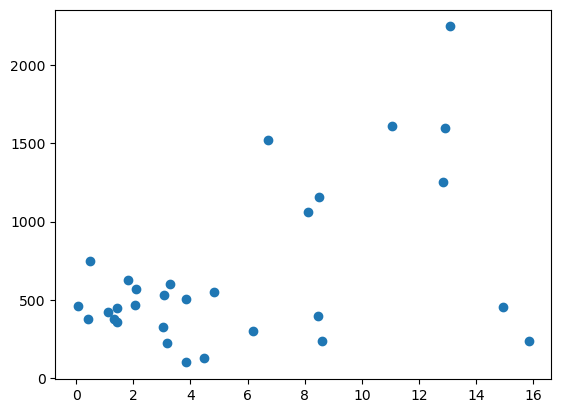

In [117]:
plt.scatter(np.abs(ols_model.resid),Y**2)

In [118]:
df=pd.read_excel('Книга1 (3).xlsx',usecols=[9,10])
# Определяем независимую и зависимую переменные
X = df['X']
Y = df['Y']

# Шаг 1: Применяем стандартную OLS-модель
ols_model = OLS(Y, X).fit()

Y_ = ols_model.predict(X)
X = df['X']

y1 = Y_/X**0.5
x1 = X
x1 = add_constant(x1)
x1 = x1/x1**0.5

ols_model = OLS(y1, x1).fit()

display(ols_model.summary())

X = df['X']

y2 = Y_/X
x2 = X
x2 = add_constant(x2)
x2 = x2/x2

ols_model = OLS(y2, x2).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.191e+30
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:25:39   Log-Likelihood:                 985.61
No. Observations:                  30   AIC:                            -1967.
Df Residuals:                      28   BIC:                            -1964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.97e-15   1.64e-15      1.813      0.081   -3.86e-16    6.33e-15
X              0.3631   2.03e-16   1.79e+15      0.000       0.363       0.363
==============================================================================
Omnibus:                        0.958   Durbin-Watson:                   0.154
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.608
Skew:                           0.346   Prob(JB):                        0.738
Kurtosis:                       2.920   Cond. No.                         54.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                     -26.000
Model:                            OLS   Adj. R-squared:                -26.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                nan
Time:                        15:25:39   Log-Likelihood:                 1061.1
No. Observations:                  30   AIC:                            -2120.
Df Residuals:                      29   BIC:                            -2119.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1815   9.78e-18   1.86e+16      0.000       0.182       0.182
X              0.1815   9.78e-18   1.86e+16      0.000       0.182       0.182
==============================================================================
Omnibus:                       23.598   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.073
Skew:                          -2.157   Prob(JB):                     1.09e-07
Kurtosis:                       5.654   Cond. No.                     4.25e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.33e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
df=pd.read_excel('Книга1 (3).xlsx',usecols=[9,10])
# Определяем независимую и зависимую переменные
X = df['X']
Y = df['Y']
# Шаг 1: Применяем стандартную OLS-модель
ols_model = OLS(Y, X).fit()

st.shapiro(ols_model.resid)

ShapiroResult(statistic=0.9497534955606828, pvalue=0.16650853837928953)

In [120]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      Y   R-squared (uncentered):                   0.914
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              307.7
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                    5.57e-17
Time:                        15:25:39   Log-Likelihood:                         -103.25
No. Observations:                  30   AIC:                                      208.5
Df Residuals:                      29   BIC:                                      209.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X              0.3631      0.021     17.540      0.000       0.321       0.405
==============================================================================
Omnibus:                        4.375   Durbin-Watson:                   2.283
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                2.820
Skew:                          -0.681   Prob(JB):                        0.244
Kurtosis:                       3.633   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 31.10.24
